# Day-74: Time Series Forecasting with RNN/LSTM

On Day 74, and we're tackling a classic and highly practical machine learning application: Time Series Forecasting! We're diving deep into the world of sequential data using Recurrent Neural Networks (RNNs) and their powerful variant, the Long Short-Term Memory (LSTM) networks. Let's get started!

You know, in the real world, data often isn't just a static table of numbers; it's a sequence that changes over time, like stock prices, weather patterns, or, in our case today, the number of bikes being rented. Predicting future values based on this historical data is what Time Series Forecasting is all about.

On Day 43, we laid the foundation by understanding what a Time Series is—data indexed, or graphed, in time order. Today, we're bringing out the heavy artillery: Deep Learning models specifically designed to handle this sequential, time-dependent data. Get ready to build some powerful predictive models!

## Topics Covered

- The Bike Sharing Dataset
- Project Objective
- Time Series forcasting with RNN/LSTM
- Code example with steps

## The Bike Sharing Dataset: Our Time Travel Guide

We’ll be using the Bike Sharing Dataset from Kaggle:
https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data

- This dataset contains the number of bike rentals in Washington, D.C., over a two-year period, hourly and daily.
- It contains hourly and daily counts of rental bikes from the Capital Bikeshare system, along with environmental and seasonal data such as:

    - temp — normalized temperature

    - atemp — “feels like” temperature

    - humidity — normalized humidity

    - windspeed — wind speed

    - season, holiday, workingday, weather — categorical features
    
    - count — total bike rentals (our target variable)
- It includes rich features like time features (hour, day of the week, month), and contextual information (holiday, working day).
- The target variable we want to predict is the count of total bike rentals (cnt).


`Analogy (The Weather Reporter)`: Think of this dataset as a detailed weather reporter's logbook. It's not just today's temperature; it's how the temperature, wind, and rain have sequentially influenced people's decisions to cycle over the past 24 months. Our model needs to learn these complex, time-dependent relationships

## Project Objective: Predicting the Future Rides

- `Objective`: To build an RNN/LSTM model that can accurately forecast the number of bikes that will be rented in the future (e.g., in the next hour or day), given the historical data and corresponding features.

### Why RNN/LSTM? 
- Traditional models like ARIMA are great, but they struggle with complex, non-linear relationships and multiple features (multivariate time series) like weather and seasonality. 
- RNNs and LSTMs excel at capturing long-term dependencies and patterns in sequential data.

## Time Series Forecasting with RNN/LSTM: The Memory Keeper

We're using Deep Learning because of its ability to 'remember' past information.


### Recurrent Neural Networks (RNN):

- `Concept`: Unlike a standard neural network where all inputs are independent, an RNN processes inputs sequentially. It has a "memory" (the hidden state) that carries information from one step in the sequence to the next.

- `Analogy (The Storyteller)`: An RNN is like a storyteller reading a book. To understand the current sentence, it relies on the context and information from the previous sentences it has already read.

- `The Problem (Vanishing Gradient)`: Standard RNNs struggle to learn very long-term dependencies (i.e., remembering what happened 100 steps ago). This is the vanishing gradient problem.

### Long Short-Term Memory (LSTM):

- `Concept`: LSTMs are a special type of RNN explicitly designed to avoid the vanishing gradient problem. They have a more complex internal structure, featuring 'gates' (Input, Forget, Output) and a 'cell state' that act as conveyor belts for information.

- `Analogy (The Editor)`: 
The LSTM is a sophisticated editor with three functions:

 - `Forget Gate`: Decides what information from the previous state is irrelevant and needs to be discarded (e.g., forgetting the temperature from last winter when predicting today's rentals).
 - `Input Gate`: Decides what new relevant information should be stored in the cell state (e.g., noting a new spike in rentals due to a public holiday).
 - `Output Gate`: Decides what part of the current cell state should be outputted as the new hidden state.

This gate mechanism allows LSTMs to selectively remember and forget, making them the gold standard for Time Series Forecasting!

In [1]:
import kagglehub
from pathlib import Path
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)
data_dir = Path(path)
df = pd.read_csv(data_dir / "hour.csv")
df.head()

c:\Users\amey9\Documents\GitHub\DataScience-100-Days-of-Data-Science\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\amey9\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
# --- Parse time & index ---
df['dteday'] = pd.to_datetime(df['dteday'])
df['timestamp'] = df['dteday'] + pd.to_timedelta(df['hr'], unit='h')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,timestamp
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [4]:
df = df.sort_values('timestamp').reset_index(drop=True)
df = df.set_index('timestamp')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
timestamp,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<Axes: >

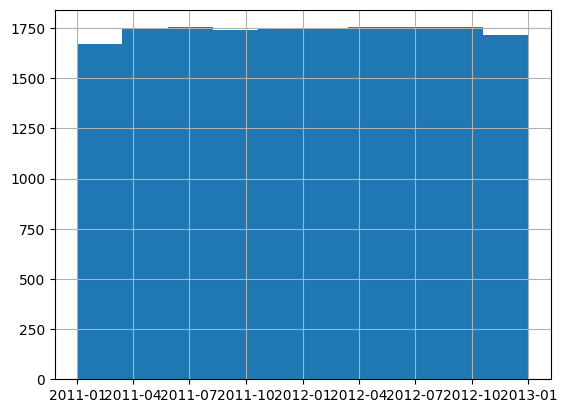

In [3]:
df['timestamp'].hist()